# Recomendacion de Peliculas

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import pandas  
import numpy as np
from scipy.cluster import hierarchy



Categorias= ["Películas de ciencia ficción ","Terror ","Drama ","Comedias Románticas ","Películas infantiles "]
arrCat = [  []  ,  []  ] 
PromE=[]



data = pandas.read_csv('ML_Peliculas.csv',sep=";",header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,Marca temporal,Género,Edad,Películas de ciencia ficción [Spider-man: lejo...,Películas de ciencia ficción [Doctor Strange],Películas de ciencia ficción [El Origen],Películas de ciencia ficción [Tortugas Ninja 2...,Películas de ciencia ficción [Arrival (La lleg...,Películas de ciencia ficción [Interestellar],Películas de ciencia ficción [Blade Runner 2049],...,"Películas infantiles [Monsters, Inc.]",Películas infantiles [Toy Story 4],Películas infantiles [La Era de Hielo],Películas infantiles [Aladdin],Películas infantiles [Kung fu Panda ],Películas infantiles [Vecinos Invasores],Películas infantiles [Soul],Películas infantiles [Grandes Héroes],Películas infantiles [Frozen],Películas infantiles [Los increíbles]
1,4/1/2021 16:13:43,Femenino,34,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y es una de mis favoritas,No la he visto,No la he visto,No la he visto,No la he visto,...,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y me gustó mucho,La vi y me pareció normal,La vi y me gustó mucho,La vi y me pareció normal,La vi y me pareció normal,La vi y me pareció normal
2,4/1/2021 16:22:03,Femenino,47,La vi y me gustó mucho,La vi y no me gustó,La vi y me gustó mucho,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No la he visto y No me gustaría verla,...,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y me pareció normal
3,4/1/2021 16:23:21,Femenino,24,La vi y me gustó mucho,La vi y es una de mis favoritas,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y es una de mis favoritas,No la he visto,...,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas
4,4/1/2021 16:24:57,Masculino,22,La vi y no me gustó,La vi y me gustó mucho,La vi y es una de mis favoritas,No la he visto y No me gustaría verla,La vi y me pareció normal,La vi y me gustó mucho,La vi y es una de mis favoritas,...,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,La vi y no me gustó,La vi y me pareció normal,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,La vi y no me gustó,La vi y es una de mis favoritas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,4/3/2021 16:26:47,Femenino,35,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y me gustó mucho,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,...,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto y No me gustaría verla,La vi y me gustó mucho,La vi y me pareció normal,No la he visto y No me gustaría verla,La vi y me pareció normal,No la he visto y No me gustaría verla,La vi y me pareció normal,La vi y me gustó mucho
94,4/3/2021 18:30:34,Femenino,24,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,...,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto,La vi y es una de mis favoritas,La vi y me gustó mucho
95,4/3/2021 19:04:47,Masculino,20,No la he visto,La vi y me gustó mucho,La vi y me pareció normal,No la he visto,La vi y es una de mis favoritas,No la he visto,No la he visto,...,La vi y me pareció normal,

## Extremos el contenido de los headers 

In [2]:
data[0][0]= "Usuario"
data=data.drop([1,2],axis=1) #Borramos la fila 1 y 2 de Genero y Edad, que pienso que no afectan tanto a la recomendacion

for i in range(1,98): #Asignamos identificador a los usuarios 
    data[0][i]= "Usuario"+str(i)
    #data[i][0]=i

headers=data.values[0,:]
print(data.shape)

for i in range(1,55):
    arr=headers[i].split("[")
    cat=arr[0]
    movie_2=arr[1].split("]")
    movie=movie_2[0]
    #"""
    if cat  == Categorias[0]:
        arrCat[0].append(1)
    elif cat ==  Categorias[1]:
        arrCat[0].append(2)
    elif cat ==  Categorias[2]:
        arrCat[0].append(3)
    elif cat ==  Categorias[3]:
        arrCat[0].append(4)
    elif cat ==  Categorias[4]:
        arrCat[0].append(5)
    #"""
    arrCat[1].append(movie)    
    
arrCat[0] = np.array(arrCat[0])
arrCat[1] = np.array(arrCat[1])

Peliculas = arrCat[1]

print(arrCat[0])
print(Peliculas)
#print(arrCat[0].shape)
#print(Peliculas.shape)

(98, 55)
[1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]
['Spider-man: lejos de casa' 'Doctor Strange' 'El Origen'
 'Tortugas Ninja 2: fuera de las sombras' 'Arrival (La llegada)'
 'Interestellar' 'Blade Runner 2049' 'Looper: Asesinos del futuro'
 'Artificial Intelligence' 'Ready Player One: comienza el juego'
 'The Martian (Misión rescate)' 'Ex machina' 'El Conjuro' 'Eso'
 'The Witch (La bruja)' 'Midsommar: el terror no espera la noche'
 'Hereditary (El legado del diablo)' 'The nun (La monja)' 'Annabelle'
 'Insidious (La noche del demonio)' 'El aro'
 'Friday the 13th (Viernes 13)' 'The Godfather (El padrino)'
 "Hachi: A Dog's Tale (Siempre a tu lado)"
 'The Pursuit of Happyness (En busca de la felicidad)'
 'Intouchables (Amigos Intocables)' 'La vida es bella'
 'Nocturnal animals (Animales nocturnos)'
 'The devil all the time (El diablo a todas horas)' 'Dunkirk (Dunkerque)'
 'Ford vs Ferrari (Contra lo imposible)' 'Parasite

### Una vez extraidos los nombres y categorias, procedo a eliminarlas de nuestra data

In [3]:

#data[[1]]= data[[1]].replace({"Femenino":0,"Masculino":1})
data=data.drop([0],axis=0) 
data
    


,0,3,4,5,6,7,8,9,10,11,...,47,48,49,50,51,52,53,54,55,56
1,Usuario1,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y es una de mis favoritas,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,...,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y me gustó mucho,La vi y me pareció normal,La vi y me gustó mucho,La vi y me pareció normal,La vi y me pareció normal,La vi y me pareció normal
2,Usuario2,La vi y me gustó mucho,La vi y no me gustó,La vi y me gustó mucho,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No la he visto y No me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,...,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y me pareció normal
3,Usuario3,La vi y me gustó mucho,La vi y es una de mis favoritas,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y es una de mis favoritas,No la he visto,No la he visto,No la he visto,...,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y es una de mis favoritas
4,Usuario4,La vi y no me gustó,La vi y me gustó mucho,La vi y es una de mis favoritas,No la he visto y No me gustaría verla,La vi y me pareció normal,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y me pareció normal,La vi y no me gustó,...,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,La vi y no me gustó,La vi y me pareció normal,La vi y me gustó mucho,La vi y no me gustó,La vi y me pareció normal,La vi y no me gustó,La vi y es una de mis favoritas
5,Usuario5,La vi y me gustó mucho,La vi y es una de mis favoritas,No le he visto y me gustaría verla,No la he visto y No me gustaría verla,No la he visto,La vi y es una de mis favoritas,No la he visto,No la he visto,No la he visto,...,La vi y es una de mis favoritas,La vi y es una de mis favoritas,La vi y me gustó mucho,No la he visto y No me gustaría verla,La vi y me gustó mucho,La vi y me gustó mucho,No le he visto y me gustaría verla,No la he visto y No me gustaría verla,La vi y es una de mis favoritas,La vi y es una de mis favoritas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Usuario93,No le he visto y me gustaría verla,No le he visto y me gustaría verla,La vi y me gustó mucho,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,No le he visto y me gustaría verla,...,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto y No me gustaría verla,La vi y me gustó mucho,La vi y me pareció normal,No la he visto y No me gustaría verla,La vi y me pareció normal,No la he visto y No me gustaría verla,La vi y me pareció normal,La vi y me gustó mucho
94,Usuario94,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,No la he visto,...,La vi y me gustó mucho,La vi y es una de mis favoritas,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,La vi y me gustó mucho,No la he visto,La vi y es una de mis favoritas,La vi y me gustó mucho
95,Usuario95,No la he visto,La vi y me gustó mucho,La vi y me pareció normal,No la he visto,La vi y es una de mis favoritas,No la he visto,No la he visto,No la he visto,No la he visto,...,La vi y me pareció normal,No la he visto,La

## Cambiamos reseñas por numeros 0..5 

#### 0 -> los 'No la he visto' para que no afecte las distancias proximas 

In [4]:

#Reemplazamos las reseñas por numeros del -1 al 5
cont=0
for i in range(3,57):
    data[[i]]= data[[i]].replace({"No la he visto":0,
                                  "No la he visto y No me gustaría verla":0,
                                  "La vi y no me gustó":1,
                                  "La vi y me pareció normal":2,
                                  "No le he visto y me gustaría verla":3,  
                                  "No la he visto y me gustaría verla":3,
                                  "La vi y me gustó mucho":4,
                                  "La vi y es una de mis favoritas":5 
                                 })
    
    PromE.append(data[[i]].mean())
    cont+=1
    
PromE = np.array(PromE)

#print(PromE)

#data=data.to_numpy()
#data = transpose(data)
#print(data.shape)

data2=data
data2



,0,3,4,5,6,7,8,9,10,11,...,47,48,49,50,51,52,53,54,55,56
1,Usuario1,4,5,5,0,0,0,0,0,0,...,4,4,4,5,4,2,4,2,2,2
2,Usuario2,4,1,4,3,3,3,0,3,3,...,4,4,4,4,1,2,3,3,3,2
3,Usuario3,4,5,3,3,3,5,0,0,0,...,5,5,5,5,5,5,5,5,5,5
4,Usuario4,1,4,5,0,2,4,5,2,1,...,4,1,2,1,2,4,1,2,1,5
5,Usuario5,4,5,3,0,0,5,0,0,0,...,5,5,4,0,4,4,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,Usuario93,3,3,4,3,3,3,3,3,3,...,4,4,0,4,2,0,2,0,2,4
94,Usuario94,4,4,0,0,0,0,0,0,0,...,4,5,4,4,4,4,4,0,5,4
95,Usuario95,0,4,2,0,5,0,0,0,0,...,2,0,5,2,4,1,2,2,2,2
96,Usuario96,4,4,0,0,0,0,0,0,0,...,4,0,2,4,2,2,4,4,2,4


## Invertimos la matriz para obtener las evaluaciones de los usuarios respecto a las peliculas 

In [5]:
data= data.to_numpy()
data = np.transpose(data)

           
X= data[1:len(data)+1,:]
Names=Peliculas

print("XSHAPE: ",X.shape)
#print("NOMBRES:",  Names)
X1 = pandas.DataFrame(X)
X1

XSHAPE:  (54, 97)


,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,4,4,4,1,4,2,4,2,0,4,...,0,4,4,2,3,3,4,0,4,2
1,5,1,5,4,5,2,5,4,4,4,...,2,0,5,3,4,3,4,4,4,0
2,5,4,3,5,3,1,4,5,2,5,...,4,0,4,2,0,4,0,2,0,0
3,0,3,3,0,0,2,1,2,0,3,...,0,0,2,0,0,3,0,0,0,0
4,0,3,3,2,0,3,3,0,5,0,...,0,0,3,0,0,3,0,5,0,0
5,0,3,5,4,5,4,3,5,5,4,...,0,0,3,0,2,3,0,0,0,0
6,0,0,0,5,0,0,3,0,3,3,...,1,0,0,0,0,3,0,0,0,0
7,0,3,0,2,0,0,3,0,0,0,...,0,0,0,0,3,3,0,0,0,0
8,0,3,0,1,0,3,3,0,5,0,...,2,0,2,0,2,3,0,0,0,0
9,0,3,0,1,4,4,4,2,5,2,...,0,0,3,0,1,3,0,0,0,0


# Utilizamos modelo MDS()

### Preparamos los datos para el modelo


In [6]:

from sklearn.manifold import MDS
data_df = pandas.DataFrame(X)

nmovies= len(Peliculas)
names = Peliculas

print(data_df.shape)

#data_df

(54, 97)


 ### Elimino los 0's

In [7]:
def dist_mov(m1,m2):  
    idx = np.logical_and(m1!=0,m2!=0)
    if len(idx) is 0: 
        m1=np.delete(m1,index)
        m2=np.delete(m2,index) 
        return
    
    return np.sum(np.abs(m1[idx]-m2[idx]))

diss = np.zeros((nmovies,nmovies))
for i in range(nmovies):
    for j in range(0,i):
        mi = data_df.values[i,1:]
        mj = data_df.values[j,1:]
        diss[i,j] = diss[j,i] = dist_mov(mi,mj)

diss2 = pandas.DataFrame(diss)
diss2
#diss

<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-7-198091c87a68>:3: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if len(idx) is 0:


,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,58.0,58.0,41.0,30.0,70.0,40.0,26.0,33.0,49.0,...,87.0,84.0,91.0,76.0,87.0,97.0,74.0,72.0,81.0,84.0
1,58.0,0.0,73.0,50.0,45.0,65.0,37.0,41.0,47.0,68.0,...,65.0,79.0,86.0,83.0,79.0,81.0,52.0,68.0,85.0,76.0
2,58.0,73.0,0.0,40.0,29.0,46.0,35.0,29.0,40.0,45.0,...,68.0,77.0,79.0,86.0,86.0,84.0,57.0,64.0,83.0,76.0
3,41.0,50.0,40.0,0.0,13.0,37.0,16.0,9.0,23.0,28.0,...,69.0,43.0,55.0,56.0,59.0,40.0,32.0,46.0,36.0,68.0
4,30.0,45.0,29.0,13.0,0.0,23.0,24.0,10.0,13.0,18.0,...,52.0,46.0,48.0,60.0,46.0,55.0,38.0,40.0,46.0,59.0
5,70.0,65.0,46.0,37.0,23.0,0.0,35.0,25.0,31.0,51.0,...,77.0,73.0,83.0,78.0,78.0,80.0,51.0,60.0,83.0,83.0
6,40.0,37.0,35.0,16.0,24.0,35.0,0.0,11.0,17.0,38.0,...,59.0,44.0,55.0,54.0,54.0,45.0,39.0,51.0,47.0,62.0
7,26.0,41.0,29.0,9.0,10.0,25.0,11.0,0.0,15.0,28.0,...,50.0,35.0,40.0,36.0,39.0,33.0,36.0,36.0,30.0,50.0
8,33.0,47.0,40.0,23.0,13.0,31.0,17.0,15.0,0.0,32.0,...,66.0,58.0,59.0,58.0,65.0,47.0,35.0,37.0,46.0,71.0
9,49.0,68.0,45.0,28.0,18.0,51.0,38.0,28.0,32.0,0.0,...,72.0,77.0,73.0,72.0,75.0,50.0,57.0,53.0,62.0,77.0


## Similitud de Peliculas con respecto a sus evaluaciones

<ipython-input-8-427a78554454>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(diss)


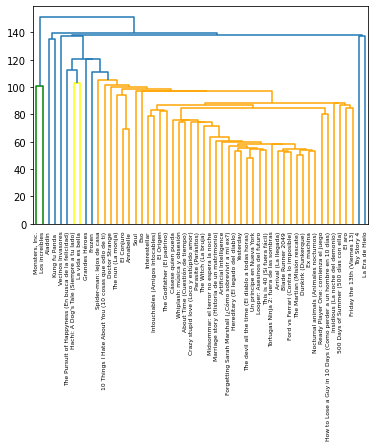

In [8]:
hierarchy.set_link_color_palette(['green','yellow','orange','black','silver'])
Z = hierarchy.linkage(diss)
dn = hierarchy.dendrogram(Z, labels=Names)
plt.show()

## Meto los datos al modelo

In [9]:
model = MDS( dissimilarity='precomputed' )
X2 = model.fit_transform(diss)
X2.shape

(54, 2)

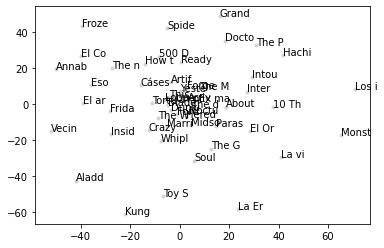

In [10]:
plt.figure()
plt.plot(X2[:,0],X2[:,1],'.',color='lightgray')

for i in range(nmovies):
    plt.text(X2[i,0],X2[i,1],names[i][:5])

plt.show()

In [11]:
model = MDS()
X2 = model.fit_transform(data_df.values[:,:])

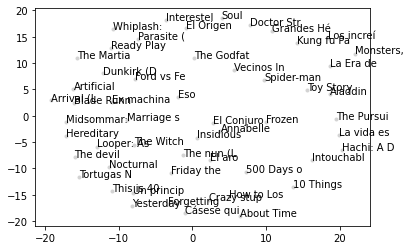

In [12]:
plt.figure()
plt.plot(X2[:,0],X2[:,1],'.',color='lightgray')
for i in range(nmovies):
    plt.text(X2[i,0],X2[i,1],names[i][:10])
plt.show()


#### Me quedo con la opcion 'MDS()'

# Consultamos el Menu

In [13]:
print(Peliculas)

['Spider-man: lejos de casa' 'Doctor Strange' 'El Origen'
 'Tortugas Ninja 2: fuera de las sombras' 'Arrival (La llegada)'
 'Interestellar' 'Blade Runner 2049' 'Looper: Asesinos del futuro'
 'Artificial Intelligence' 'Ready Player One: comienza el juego'
 'The Martian (Misión rescate)' 'Ex machina' 'El Conjuro' 'Eso'
 'The Witch (La bruja)' 'Midsommar: el terror no espera la noche'
 'Hereditary (El legado del diablo)' 'The nun (La monja)' 'Annabelle'
 'Insidious (La noche del demonio)' 'El aro'
 'Friday the 13th (Viernes 13)' 'The Godfather (El padrino)'
 "Hachi: A Dog's Tale (Siempre a tu lado)"
 'The Pursuit of Happyness (En busca de la felicidad)'
 'Intouchables (Amigos Intocables)' 'La vida es bella'
 'Nocturnal animals (Animales nocturnos)'
 'The devil all the time (El diablo a todas horas)' 'Dunkirk (Dunkerque)'
 'Ford vs Ferrari (Contra lo imposible)' 'Parasite (Parásitos)'
 'Whiplash: música y obsesión'
 'Marriage story (Historia de un matrimonio)' 'Un principe en Nueva York'
 

# Peliculas iniciales 


In [14]:
POP=X2[50]
PIP=X2[1]
PIP

array([ 7.79992643, 17.15352081])

In [15]:
from scipy.spatial import distance 

def Recomendaciones_de_(x):
   
    Opciones=x
    Recomendaciones=[]
    
    RecIndx=[]
    OpcIndx=[]
    
    Mn=5
    
    for i in range(0,len(Opciones)):
        res = np.where(Peliculas == Opciones[i])
        indx= res[0][0]
        OpcIndx.append(indx) #Guardo los indices
        
        
    for i in range(0,5):
        indxO=OpcIndx[i]
        POP=X2[indxO]      
        for j in range(0,2):   
                indx=0
                dist=100000000000000
                bol=True
                bol_rec=True               
                for w in range (0,len(X2)):
                    #Medir distancia 
                    #Append al arr Recomendaciones
                    dst = distance.euclidean(POP,X2[w])
                    bol= w in OpcIndx
                    bol_rec =w in RecIndx
                    #print(w)
                    #print("i: ",w," = " ,bol)
                    #print("i: ",w," = " ,bol_rec)
                    #print()
                    if (bol is False):

                           if (dist>dst and  bol_rec == False):

                            dist=dst
                            indX2=w
                            #print(dist)
                            #print()
                            #print(indX2)
                            bol=True
                            bol_rec=True   

            
            
            
                Recomendaciones.append(Peliculas[indX2])
                RecIndx.append(indX2)
        
    print(Opciones)
    print(OpcIndx)
    
    print()
    
    print(Recomendaciones)
    print(RecIndx)
    print()

# Buscamos recomendaciones

## Obtenemos Recomendaciones bien padres <3

### Recomendacion 1

In [16]:
x = ['Frozen','Los increíbles','10 Things I Hate About You (10 cosas que odio de ti)','Cásese quien pueda', 'Un principe en Nueva York']
Recomendaciones_de_(x)


['Frozen', 'Los increíbles', '10 Things I Hate About You (10 cosas que odio de ti)', 'Cásese quien pueda', 'Un principe en Nueva York']
[52, 53, 43, 36, 34]

['Annabelle', 'El Conjuro', 'Kung fu Panda ', 'Monsters, Inc.', 'Intouchables (Amigos Intocables)', '500 Days of Summer (500 días con ella)', 'Forgetting Sarah Marshall (¿Cómo sobrevivir a mi ex?)', 'Crazy stupid love (Loco y estúpido amor)', 'Yesterday', 'This is 40 (Si fuera fácil)']
[18, 12, 48, 44, 25, 39, 41, 40, 38, 42]



### Reconocimiento 2

In [17]:
x = ['El Conjuro','Eso','Interestellar','The Witch (La bruja)', 'Arrival (La llegada)']
Recomendaciones_de_(x)

['El Conjuro', 'Eso', 'Interestellar', 'The Witch (La bruja)', 'Arrival (La llegada)']
[12, 13, 5, 14, 4]

['Annabelle', 'Insidious (La noche del demonio)', 'Ford vs Ferrari (Contra lo imposible)', 'The Godfather (El padrino)', 'El Origen', 'Parasite (Parásitos)', 'Marriage story (Historia de un matrimonio)', 'Looper: Asesinos del futuro', 'Blade Runner 2049', 'Artificial Intelligence']
[18, 19, 30, 22, 2, 31, 33, 7, 6, 8]



### Recomendacion 3

In [18]:
x = ["Hachi: A Dog's Tale (Siempre a tu lado)",'Nocturnal animals (Animales nocturnos)','El Origen','Arrival (La llegada)', 'The Martian (Misión rescate)']
Recomendaciones_de_(x)

["Hachi: A Dog's Tale (Siempre a tu lado)", 'Nocturnal animals (Animales nocturnos)', 'El Origen', 'Arrival (La llegada)', 'The Martian (Misión rescate)']
[23, 27, 2, 4, 10]

['La vida es bella', 'Intouchables (Amigos Intocables)', 'Looper: Asesinos del futuro', 'Tortugas Ninja 2: fuera de las sombras', 'Interestellar', 'Soul', 'Blade Runner 2049', 'Artificial Intelligence', 'Dunkirk (Dunkerque)', 'Ready Player One: comienza el juego']
[26, 25, 7, 3, 5, 50, 6, 8, 29, 9]

